In [1]:
import matplotlib.pyplot as plt
import numpy as np
import eFELExt
import re

In [8]:
n = 122

In [9]:
selected_keys = sorted(np.load('vmcell/hof_chk3.npy', allow_pickle=True).tolist().keys())
len(selected_keys)

29

('control_719', 1417, 16)
('control_719', 1650, 34)
('control_719', 2273, 17)
('control_719', 2891, 35)
('control_719', 3037, 43)
('control_719', 3222, 3)
control_719 3277 39 | 6 | 0


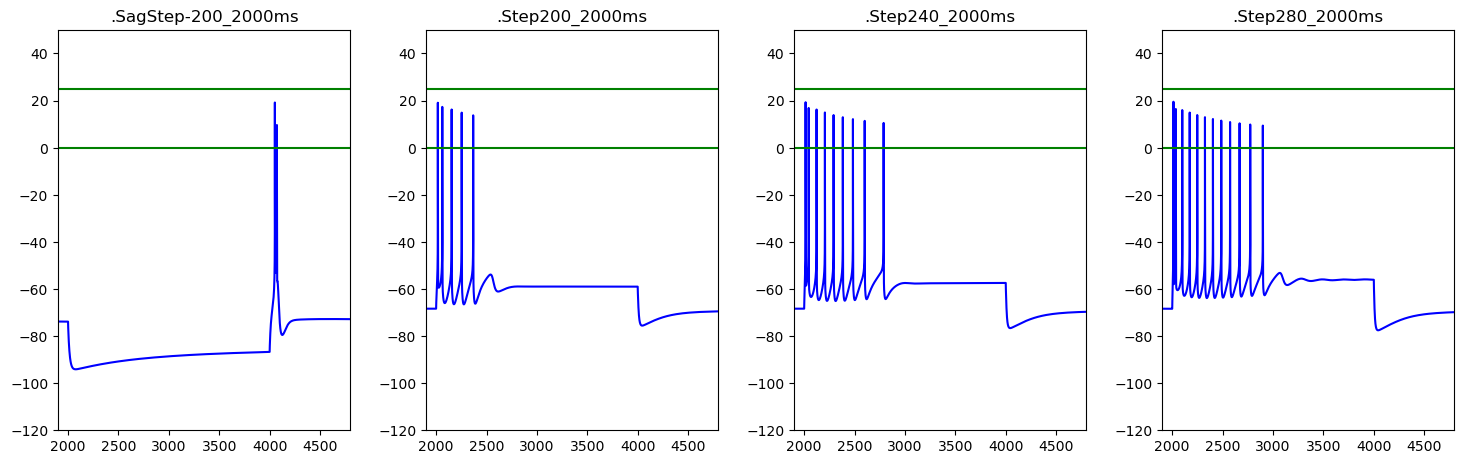




('control_719', 4830, 9)
('control_719', 5060, 9)
('control_719', 5463, 21)
('control_719', 6265, 36)
('control_719', 6292, 13)
('control_719', 7254, 21)
('control_719', 7407, 38)
control_719 7655 35 | 14 | 1


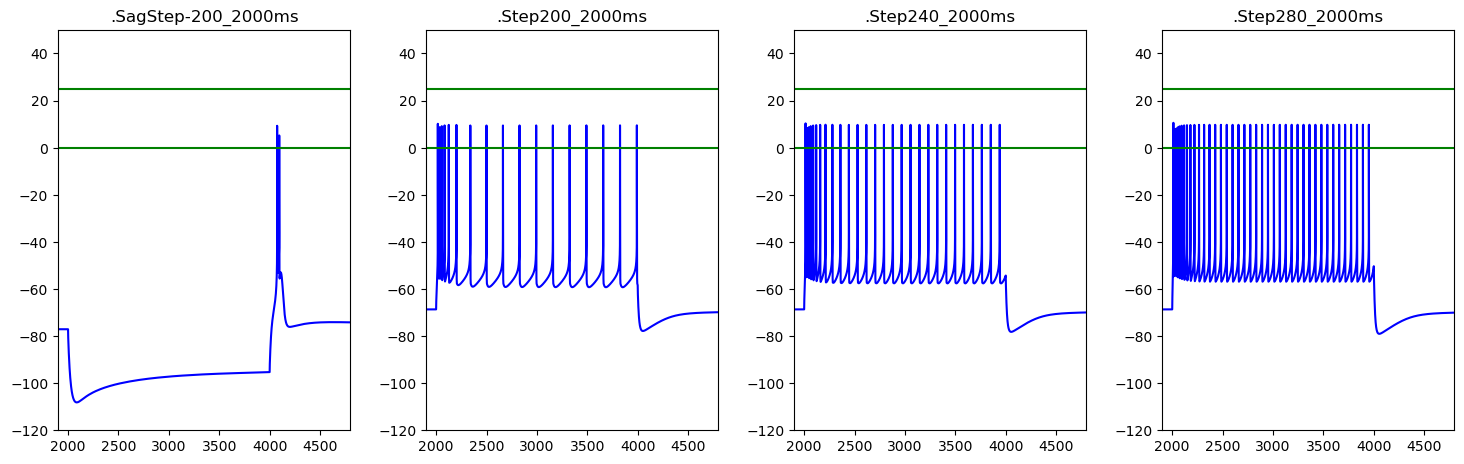




('control_719', 7833, 6)
control_719 8060 3 | 16 | 2


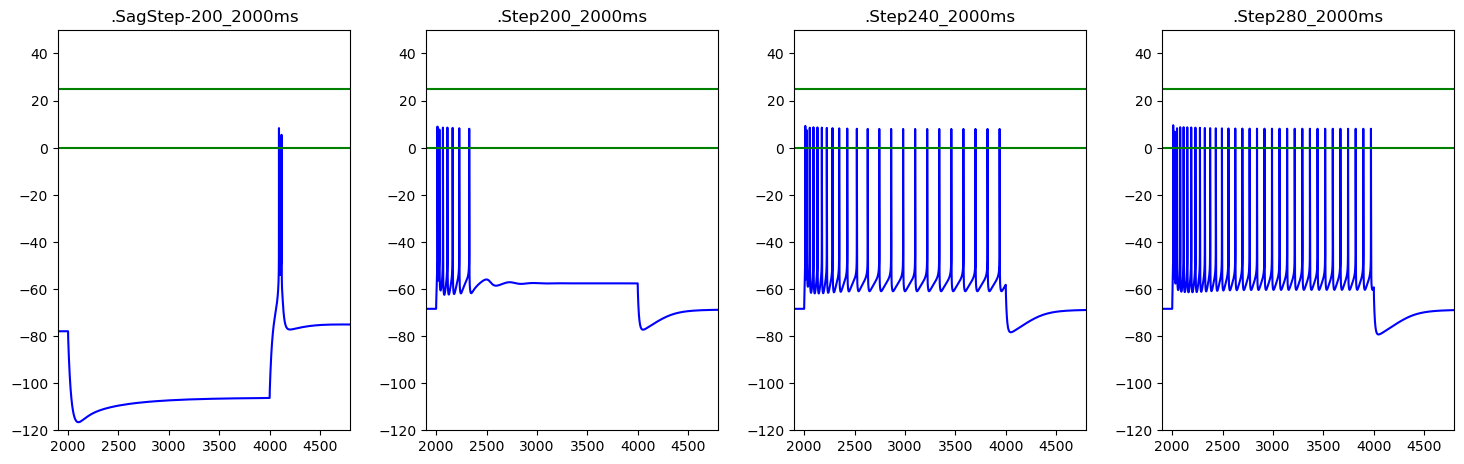




control_719 8279 15 | 17 | 3


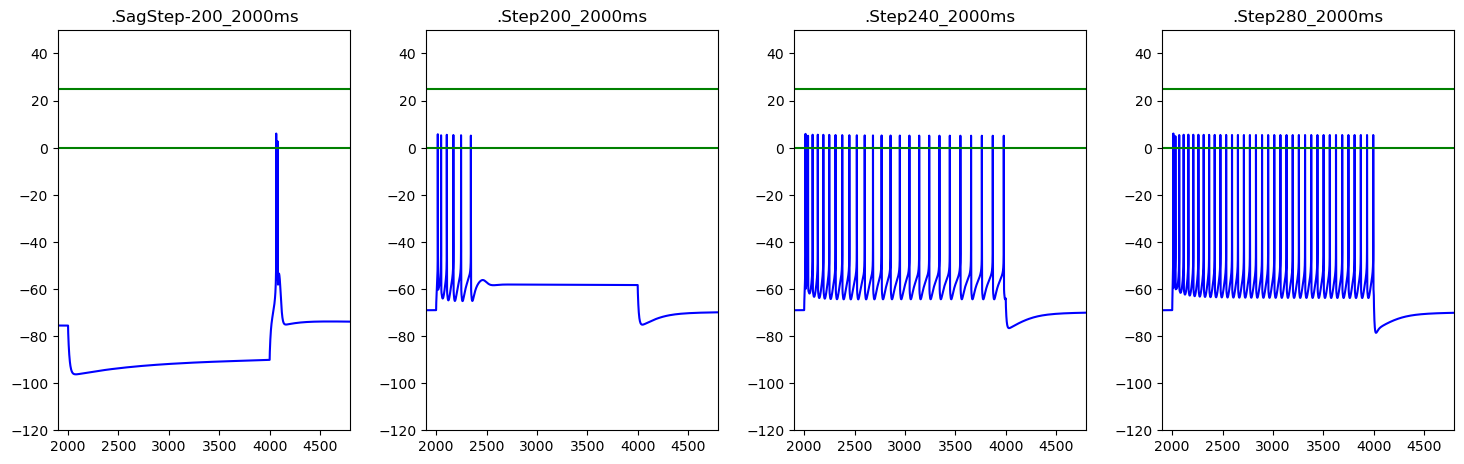




('control_719', 9233, 27)
('control_719', 9621, 13)
('control_719', 10041, 17)
('control_719', 10094, 24)
('control_719', 10298, 7)
('control_719', 10497, 28)
('control_719', 10877, 23)
('control_719', 11097, 40)
('control_719', 11219, 12)
('control_719', 11609, 37)
control_719 11646 20 | 28 | 4


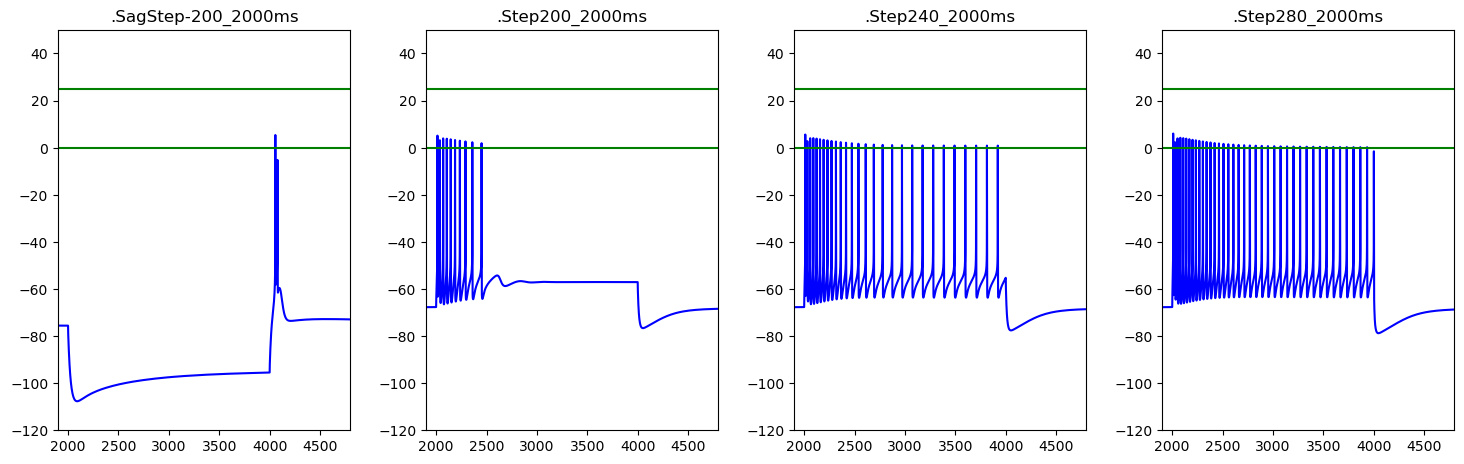




('control_719', 11663, 20)
('control_719', 11895, 34)
('control_719', 11896, 34)
('control_719', 12201, 28)
('control_719', 12293, 7)
('control_719', 12297, 11)
('control_719', 12421, 7)
('control_719', 12485, 6)
('control_719', 12618, 17)
('control_719', 12644, 36)
('control_719', 12681, 7)
('control_719', 13019, 23)
('control_719', 13281, 33)
('control_719', 13429, 13)
('control_719', 13429, 28)
('control_719', 13646, 20)
('control_719', 13662, 20)
('control_719', 13854, 17)
control_719 13866 6 | 47 | 5


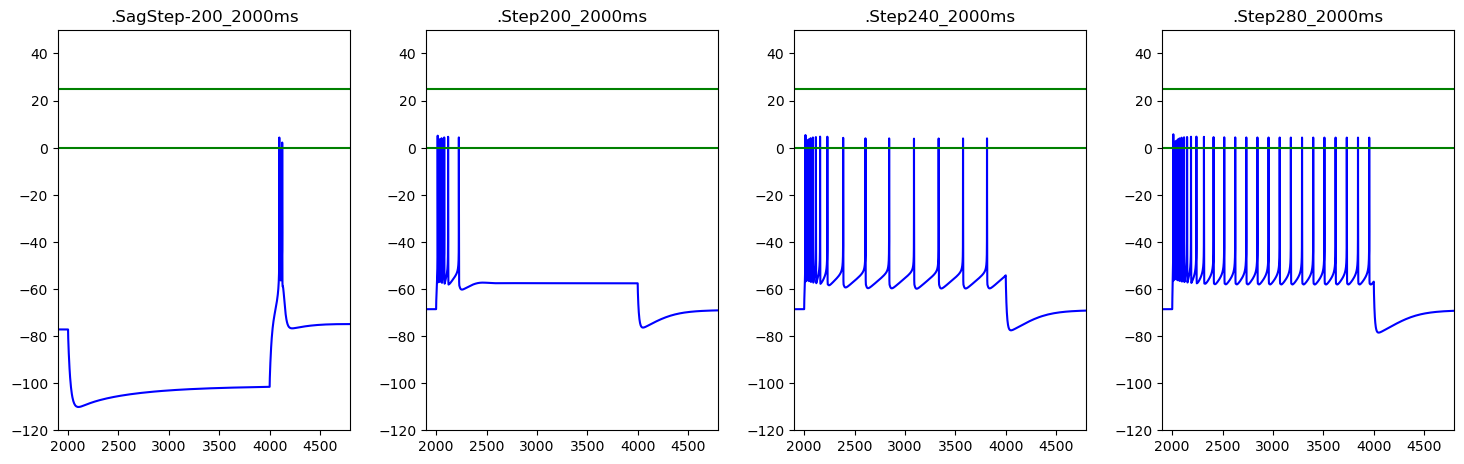




('control_719', 14245, 41)
('control_719', 14424, 33)
control_719 14437 18 | 50 | 6


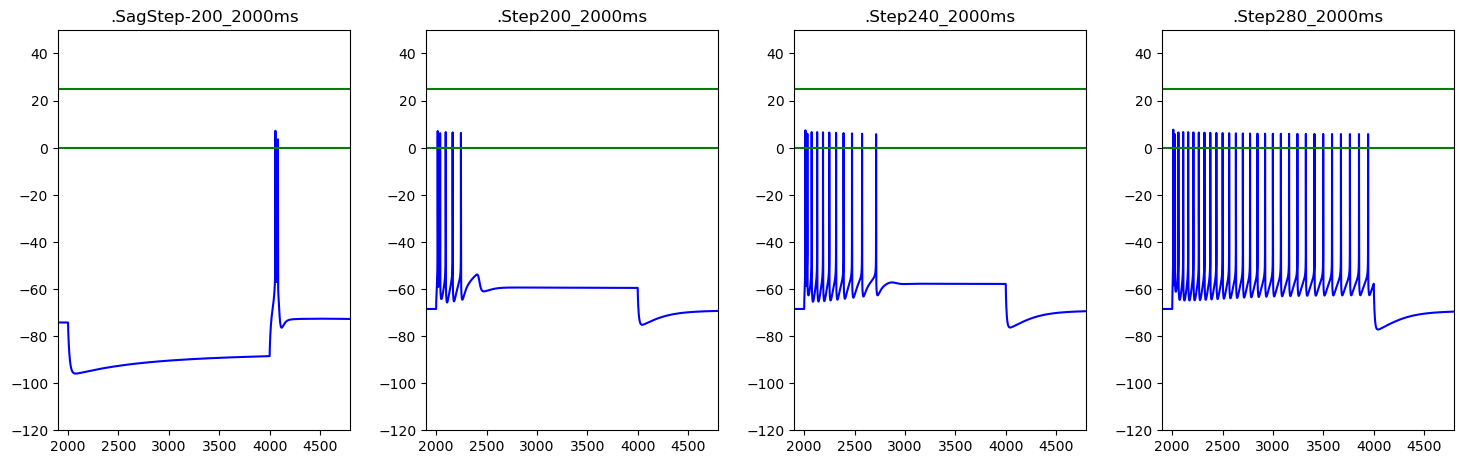




('control_719', 14489, 6)
control_719 14493 15 | 52 | 7


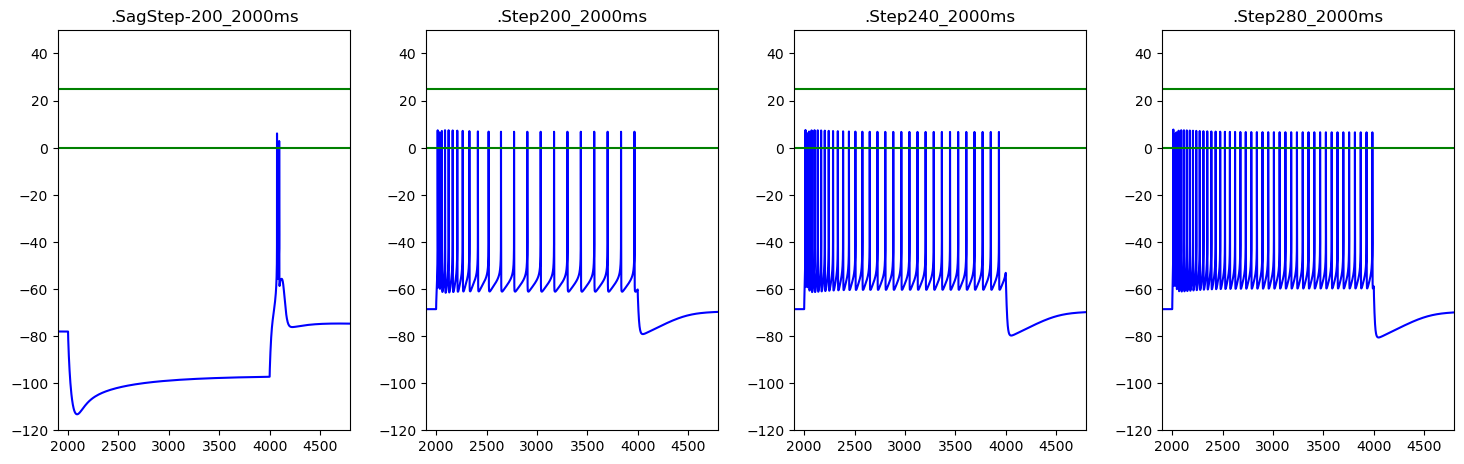




control_719 14641 17 | 53 | 8


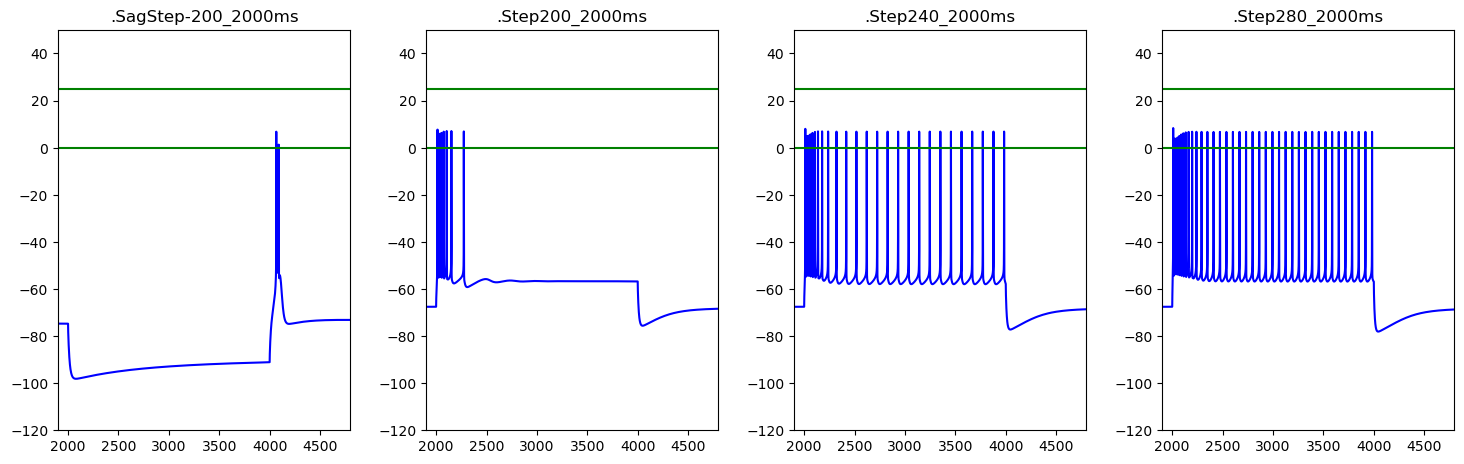




('control_719', 14829, 28)
('control_719', 14866, 18)
('control_719', 15090, 20)
('control_719', 15295, 42)
('control_719', 15418, 22)
control_719 15680 18 | 59 | 9


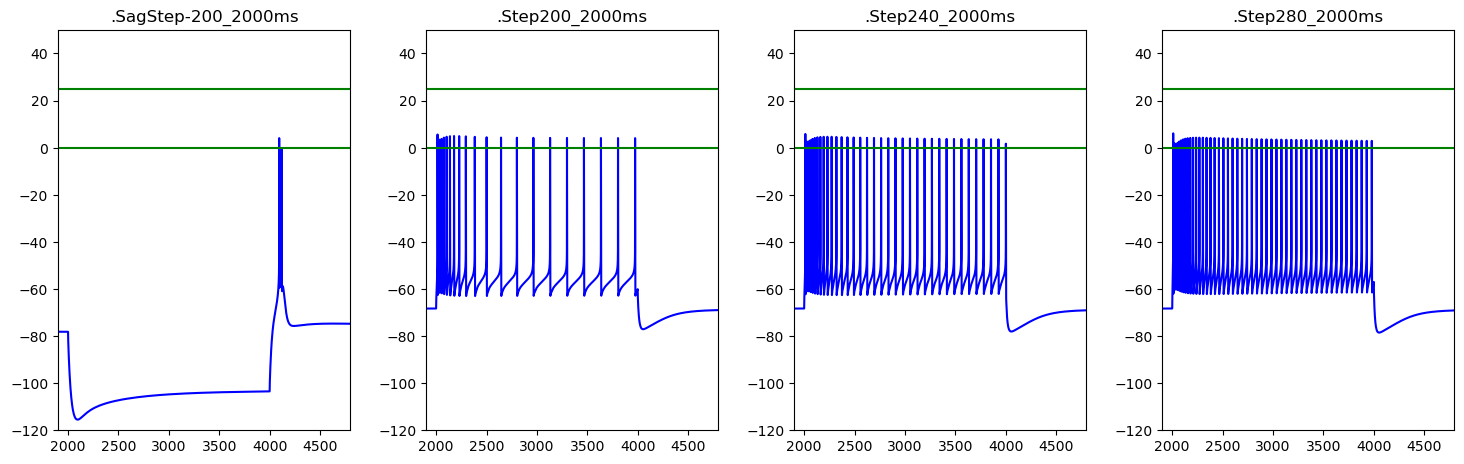




('control_719', 15874, 15)
('control_719', 15895, 17)
control_719 16641 43 | 62 | 10


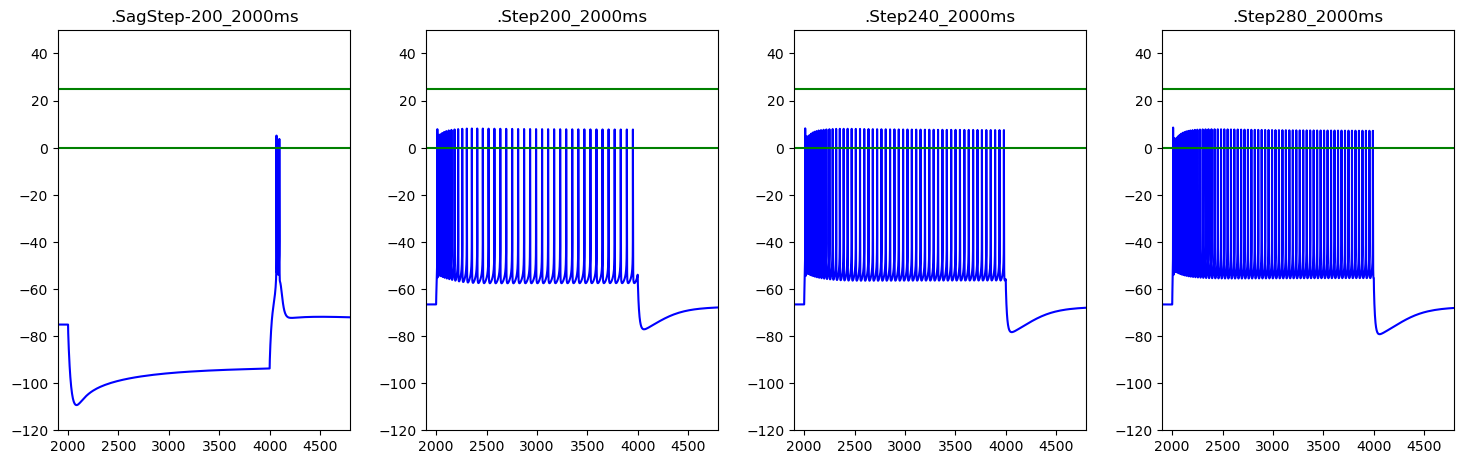




('control_719', 16662, 22)
('control_719', 16686, 0)
('control_719', 16855, 22)
('control_719', 16896, 20)
('control_719', 17211, 38)
('control_719', 17245, 40)
('control_719', 17656, 20)
control_719 17878 18 | 70 | 11


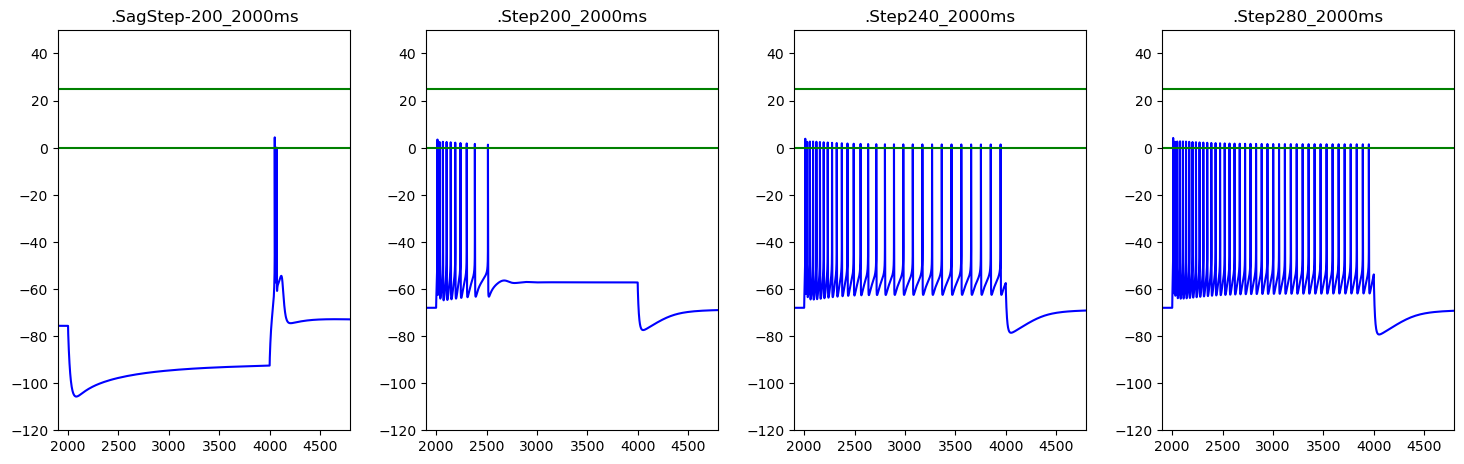




control_719 17894 20 | 71 | 12


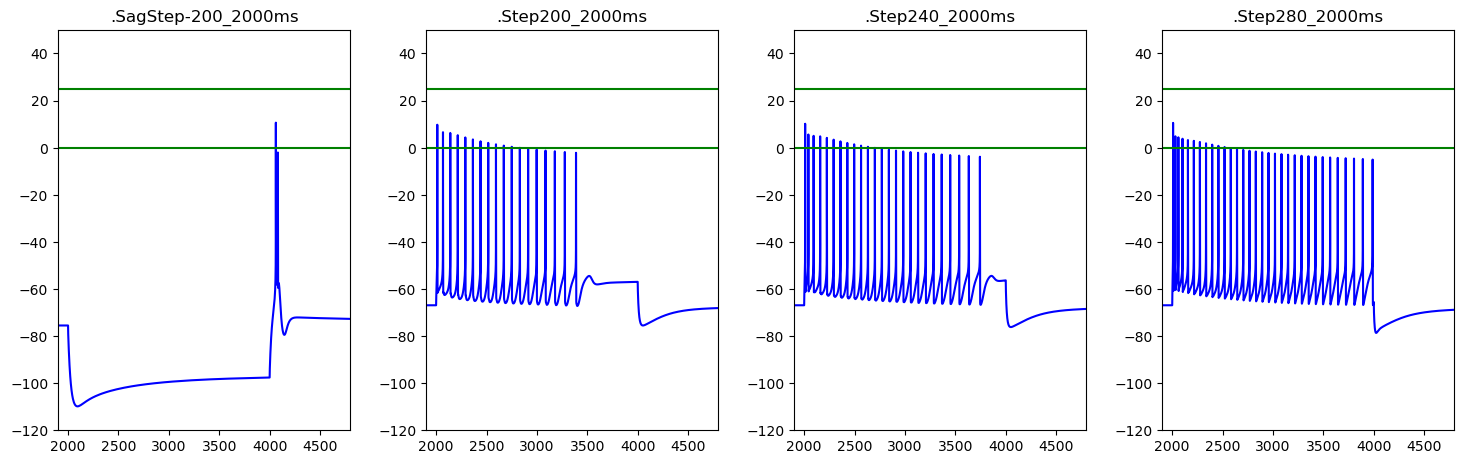




control_719 18013 29 | 72 | 13


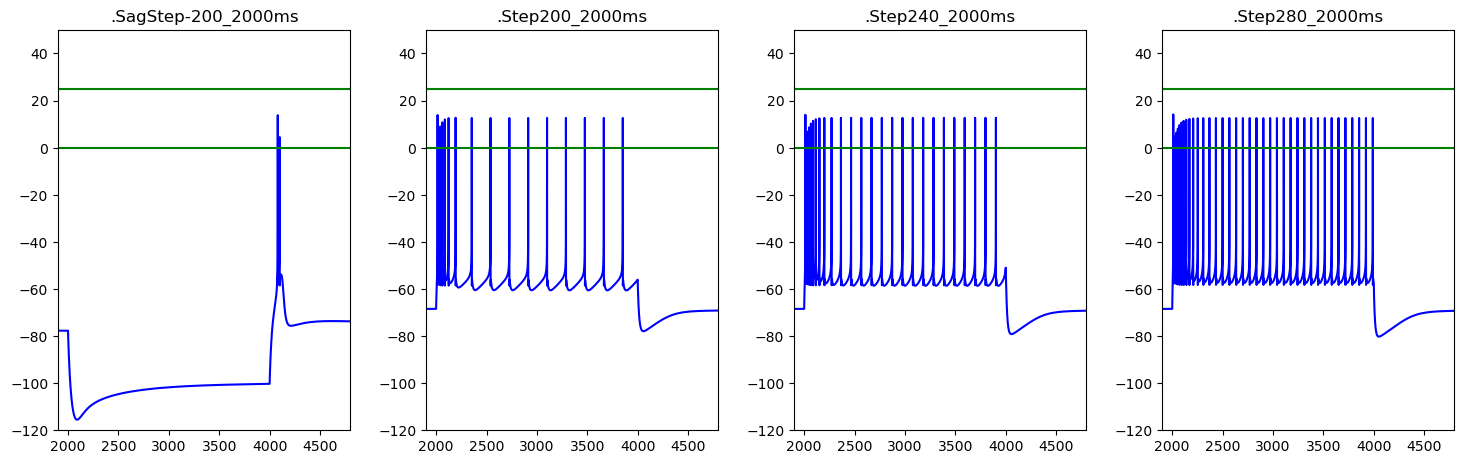




('control_719', 18269, 10)
('control_719', 18277, 35)
('control_719', 18441, 27)
control_719 18611 10 | 76 | 14


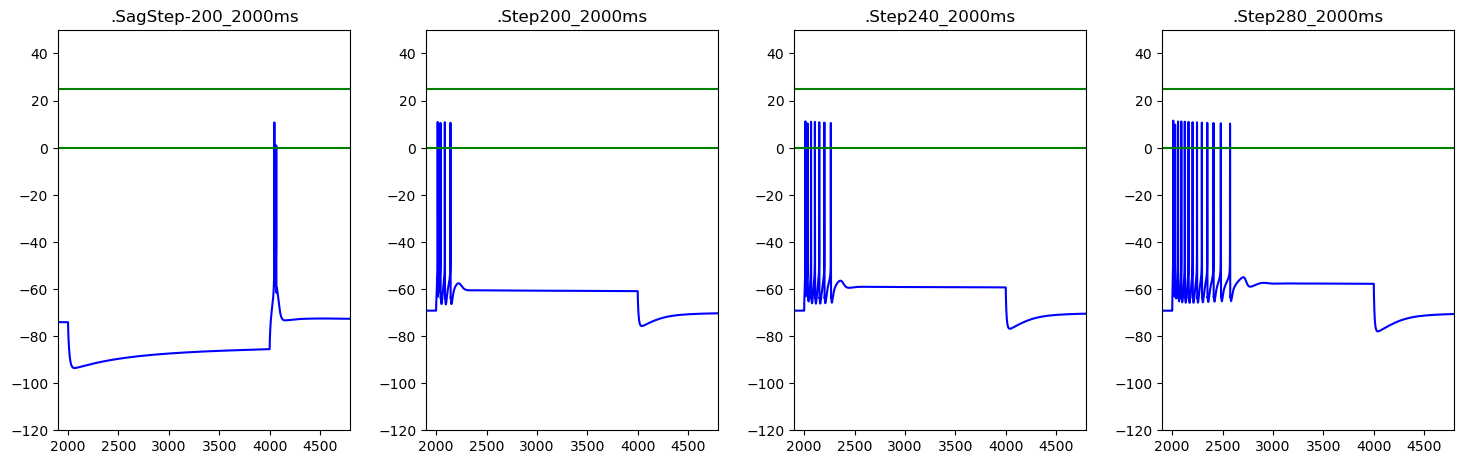




('control_719', 19046, 10)
('control_719', 19216, 15)
('control_719', 19408, 21)
control_719 19494 32 | 80 | 15


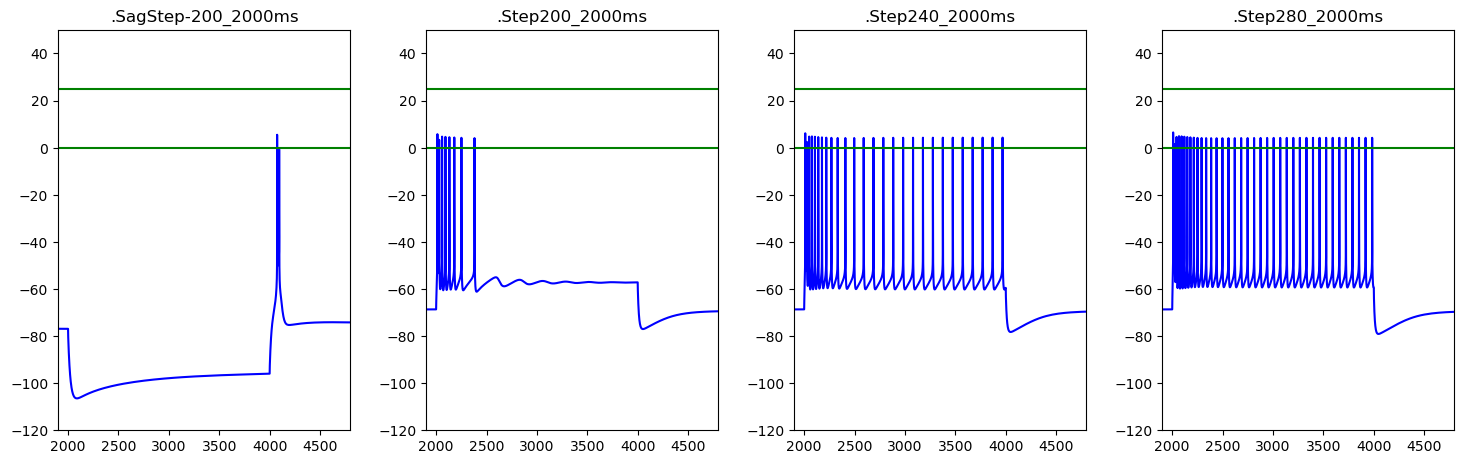




('control_719', 19690, 18)
('control_719', 19700, 36)
control_719 19842 33 | 83 | 16


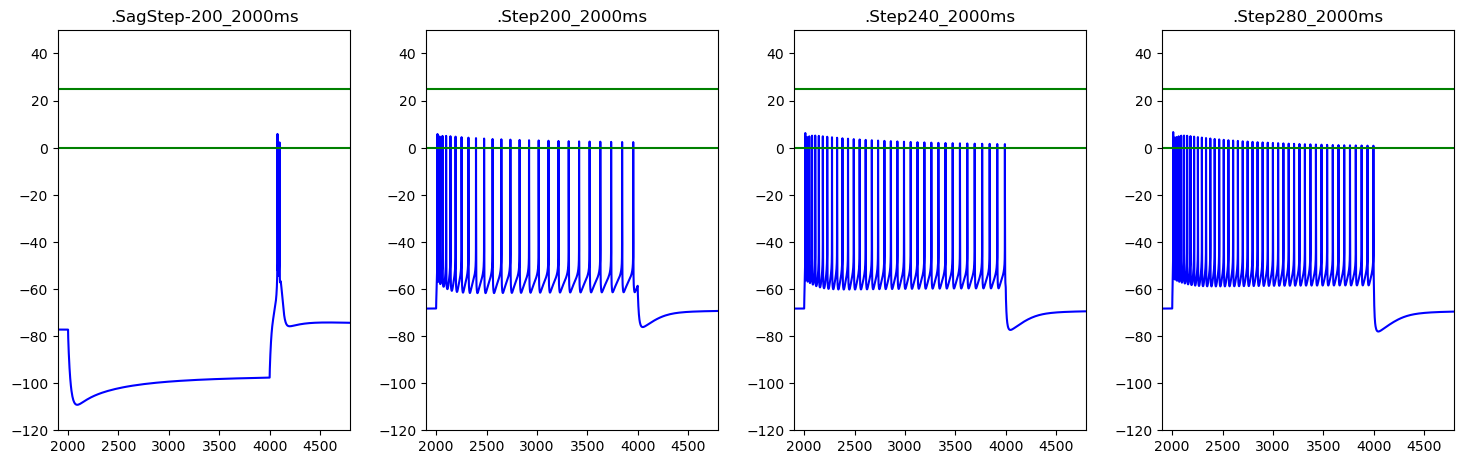




lesioned_719 1280 4 | 84 | 17


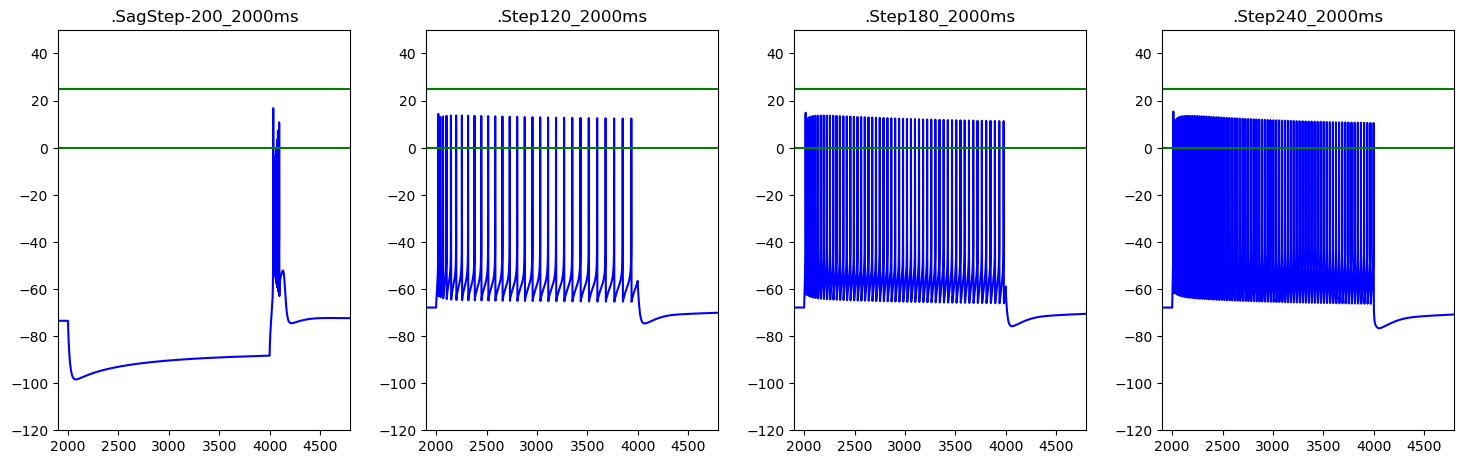




('lesioned_719', 2028, 3)
('lesioned_719', 3671, 1)
('lesioned_719', 3836, 9)
('lesioned_719', 4267, 0)
lesioned_719 5258 1 | 89 | 18


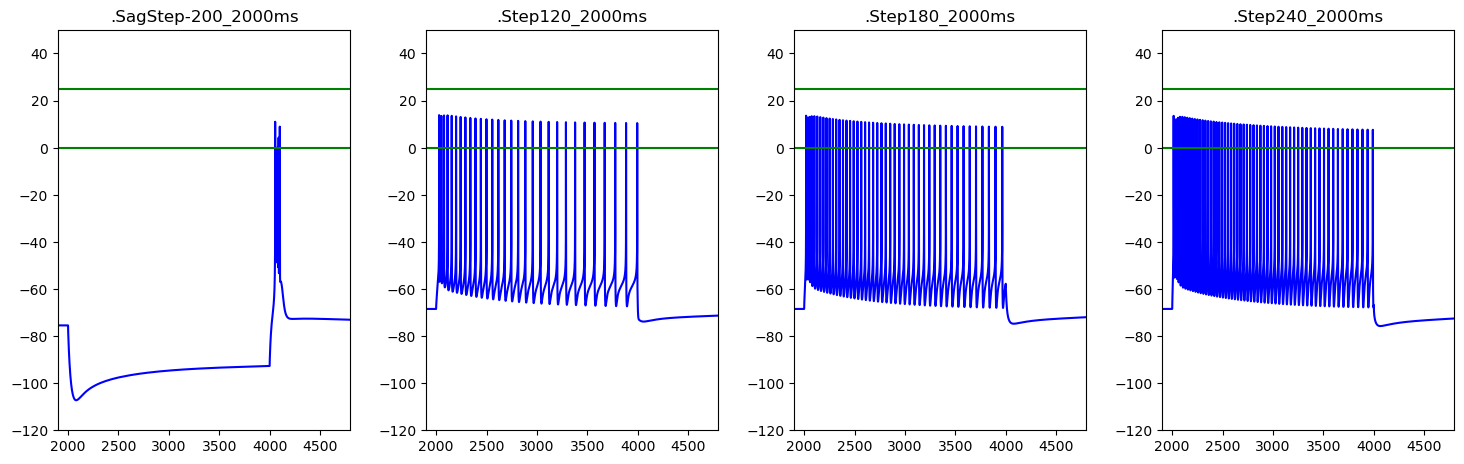




('lesioned_719', 6236, 9)
('lesioned_719', 6866, 5)
lesioned_719 7006 3 | 92 | 19


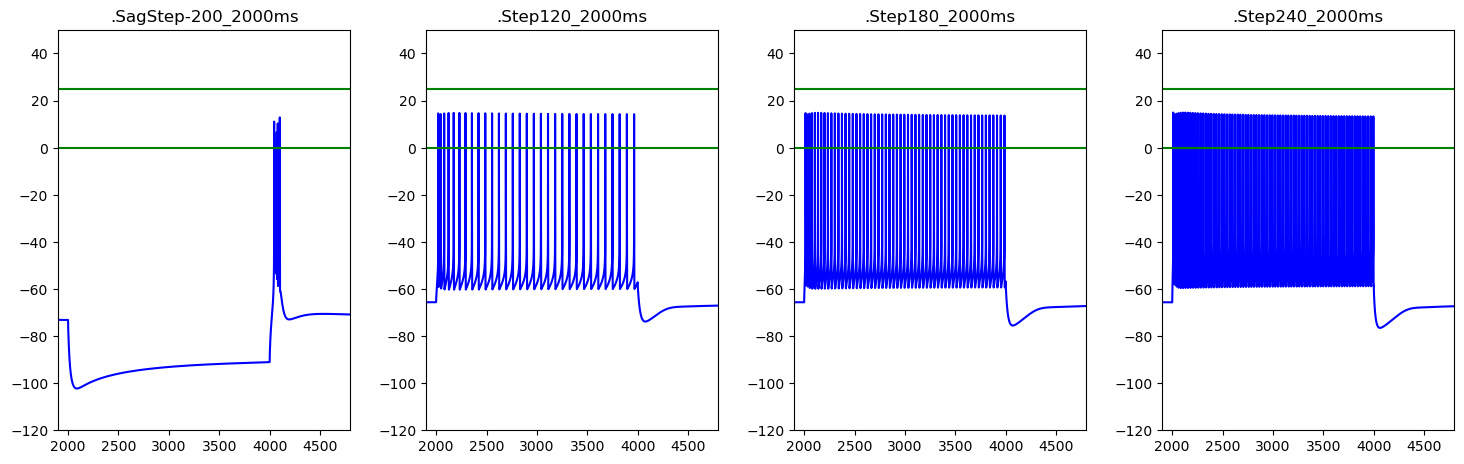




('lesioned_719', 7897, 3)
('lesioned_719', 8047, 3)
lesioned_719 8640 3 | 95 | 20


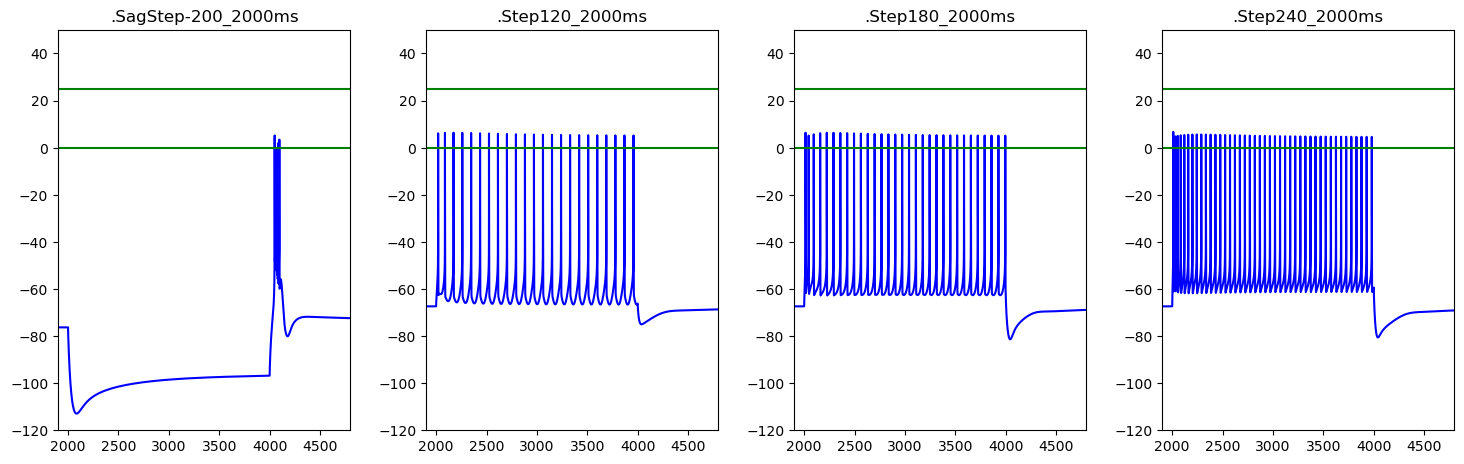




lesioned_719 9601 5 | 96 | 21


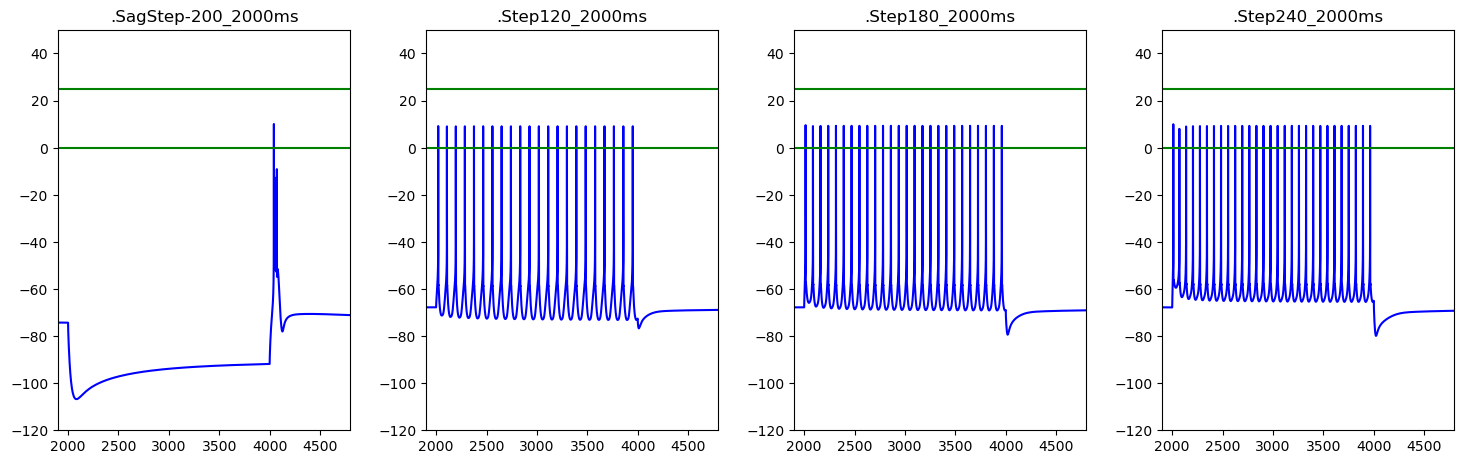




lesioned_719 10013 0 | 97 | 22


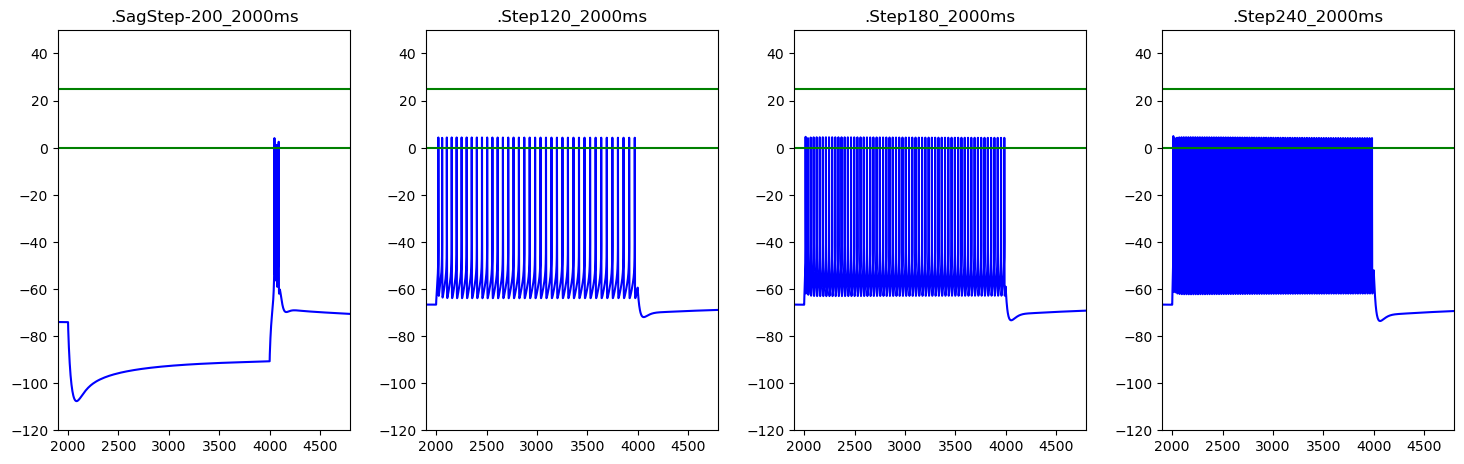




('lesioned_719', 10027, 3)
lesioned_719 10099 0 | 99 | 23


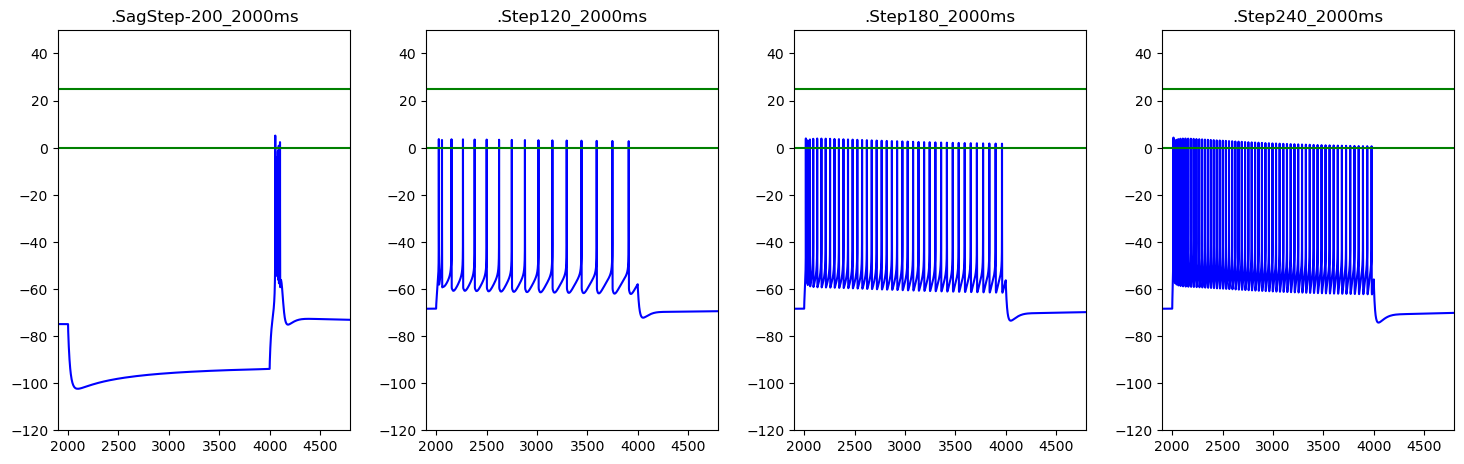




('lesioned_719', 11218, 1)
lesioned_719 12211 8 | 101 | 24


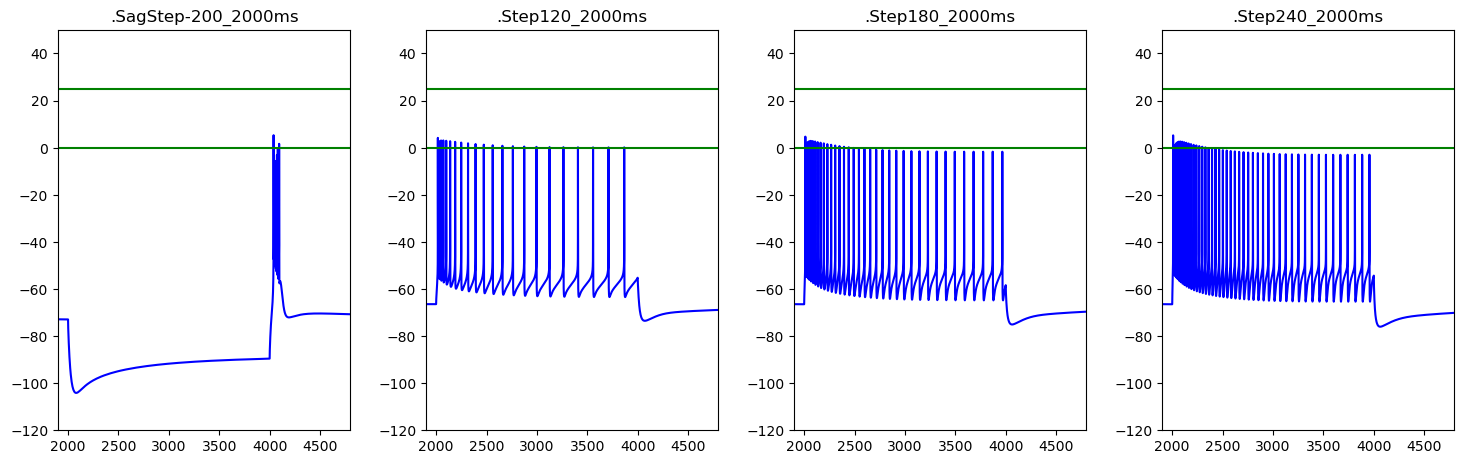




lesioned_719 12648 1 | 102 | 25


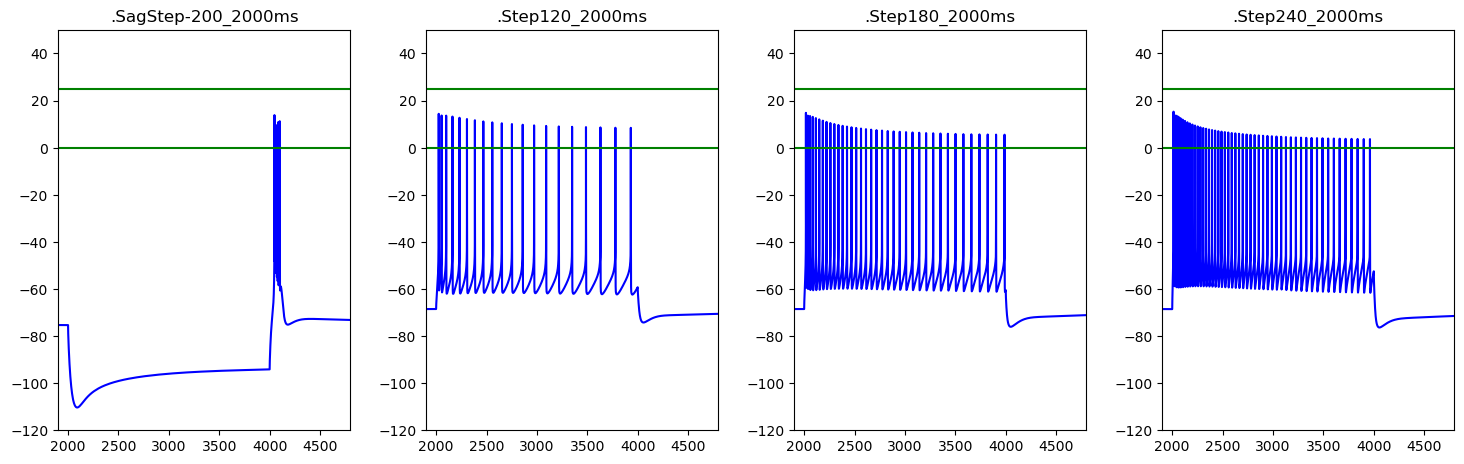




('lesioned_719', 13005, 12)
lesioned_719 13033 3 | 104 | 26


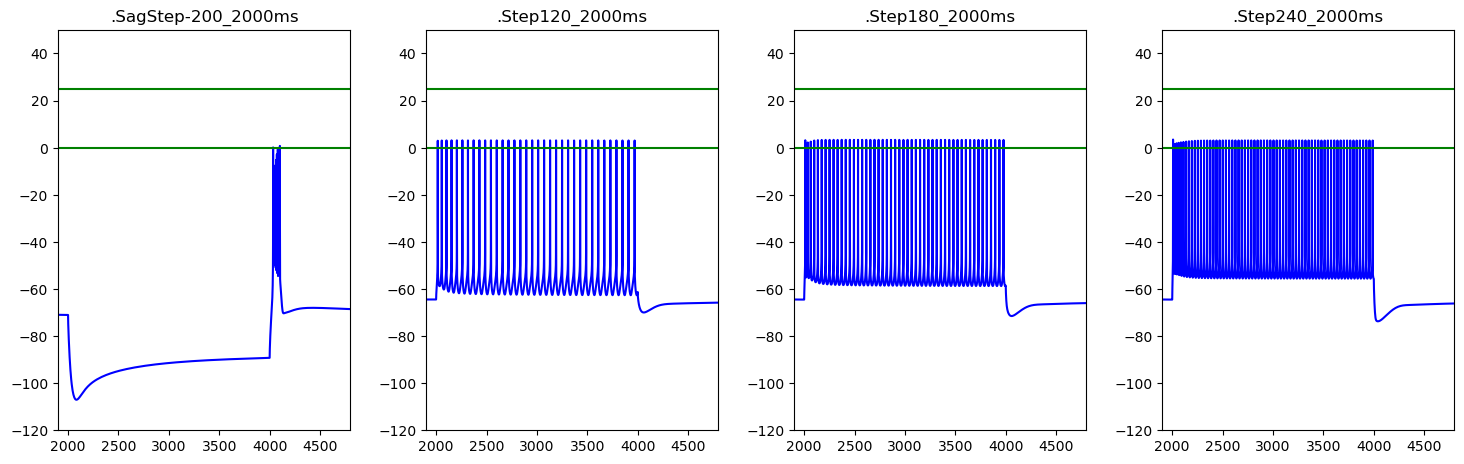




('lesioned_719', 13698, 3)
('lesioned_719', 13851, 0)
('lesioned_719', 14218, 3)
('lesioned_719', 14476, 0)
lesioned_719 14659 5 | 109 | 27


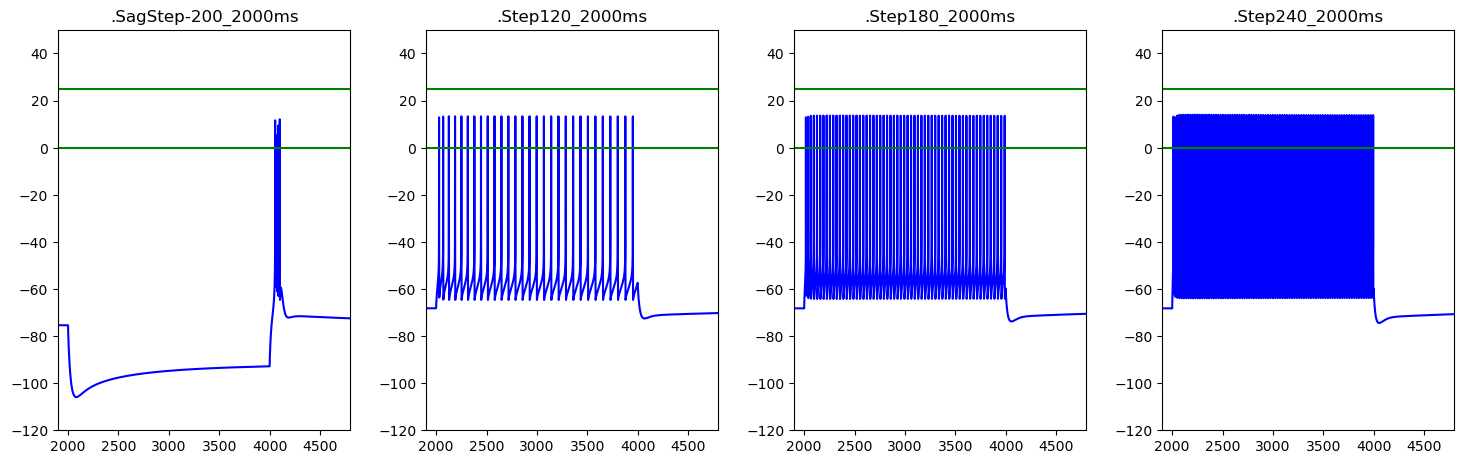




('lesioned_719', 16211, 0)
('lesioned_719', 16216, 8)
('lesioned_719', 16278, 7)
('lesioned_719', 18002, 10)
('lesioned_719', 18037, 0)
('lesioned_719', 18403, 8)
('lesioned_719', 18873, 8)
('lesioned_719', 19072, 10)
('lesioned_719', 19478, 7)
lesioned_719 19869 4 | 119 | 28


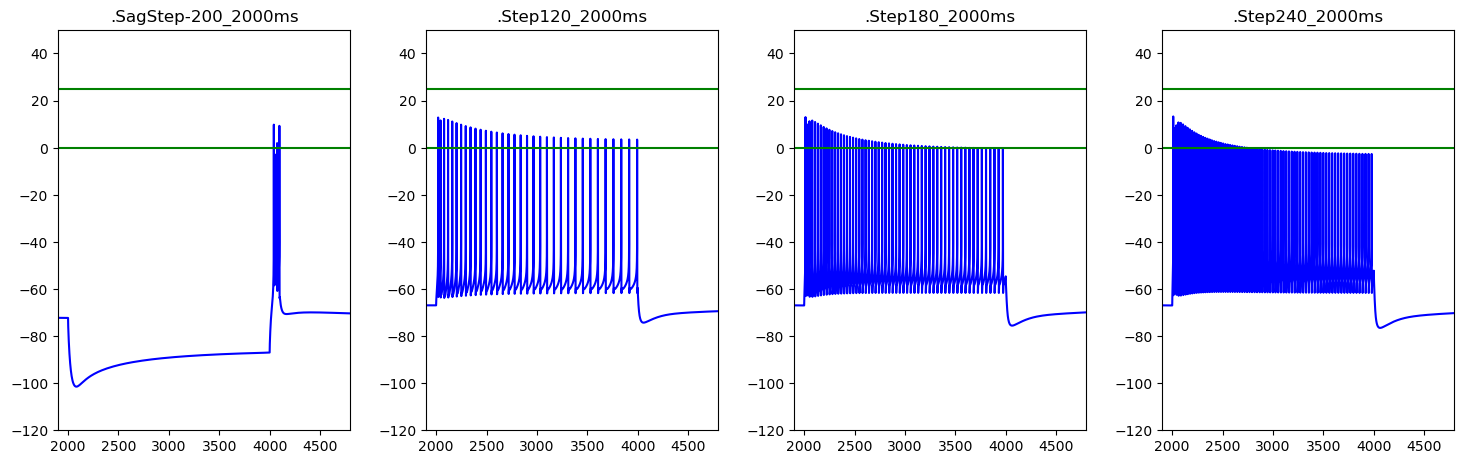




('lesioned_719', 19889, 1)
('lesioned_719', 19894, 11)


In [10]:
for i in range(n):
    trace = np.load('/home/francesco/vm/traces/trace_nq_%d.npy' % i, allow_pickle=True).tolist()
    
    if trace['key'] not in selected_keys:
        print(trace['key'])
        continue
        
    del trace['responses']['.Pulse.soma.v']
    del trace['responses']['.Step_2000ms.soma.v']  
    
    print('%s %d %d | %d | %d' % (trace['key'] + (i, selected_keys.index(trace['key']))))
    plt.figure(figsize=(15, 5))

    for j, (lbl, tr) in enumerate(sorted(trace['responses'].items())):
        plt.subplot(1, 4, j+1)
        plt.title(lbl.replace('.soma.v', ''))
        plt.plot(tr['time'], tr['voltage'], color='blue')
        plt.plot([1900, 4800], [0, 0], 'green')
        plt.plot([1900, 4800], [25, 25], 'green')
        plt.xlim([1900, 4800])
        plt.ylim([-120, 50])
        
    plt.tight_layout(pad=2)
    plt.show()
    
    print('\n\n')